In [93]:
import pandas as pd
import re
import numpy as np
from datetime import datetime

from datetime import datetime

import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt

In [94]:
def convert_to_dict(value):
    match = re.search(r'\{(.+?)\}', value)
    if match:
        content = match.group(1)
        dict_value = {}
        for item in content.split(','):
            if ': ' in item:
                key, val = item.split(': ', 1)
                dict_value[key.strip()] = int(val.strip()) if val.strip().isdigit() else val.strip()
        return dict_value
    return None

def convert_timestamp(client):
    timestamp_s = client['timestamp'] / 1000  
    readable_date = datetime.fromtimestamp(timestamp_s) 
    return readable_date.strftime("%Y-%m-%d %H:%M:%S")  

In [95]:
l4j_v1 = pd.read_csv('log4j_v1_10000.csv')
l4j_v1['client'] = l4j_v1['n'].apply(convert_to_dict)
l4j_v1['version'] = l4j_v1['r'].apply(convert_to_dict)

l4j_v2 = pd.read_csv('log4j_v2_10000.csv')
l4j_v2['client'] = l4j_v2['n'].apply(convert_to_dict)
l4j_v2['version'] = l4j_v2['r'].apply(convert_to_dict)

In [96]:
l4j_v1

,n,r,m,client,version
0,(:Release {id: org.alfasoftware:morf-postgresq...,"[:dependency {scope: test,targetVersion: 1.2.15}]","(:Artifact {found: true,id: log4j:log4j})",{'id': 'org.alfasoftware:morf-postgresql:2.8.0...,"{'scope': 'test', 'targetVersion': '1.2.15'}"
1,(:Release {id: org.alfasoftware:morf-postgresq...,"[:dependency {scope: test,targetVersion: 1.2.15}]","(:Artifact {found: true,id: log4j:log4j})",{'id': 'org.alfasoftware:morf-postgresql:2.8.1...,"{'scope': 'test', 'targetVersion': '1.2.15'}"
2,(:Release {id: org.alfasoftware:morf-postgresq...,"[:dependency {scope: test,targetVersion: 1.2.15}]","(:Artifact {found: true,id: log4j:log4j})",{'id': 'org.alfasoftware:morf-postgresql:2.8.2...,"{'scope': 'test', 'targetVersion': '1.2.15'}"
3,(:Release {id: org.alfasoftware:morf-postgresq...,"[:dependency {scope: test,targetVersion: 1.2.15}]","(:Artifact {found: true,id: log4j:log4j})",{'id': 'org.alfasoftware:morf-postgresql:2.8.3...,"{'scope': 'test', 'targetVersion': '1.2.15'}"
4,(:Release {id: com.twitter:summingbird-spark_2...,"[:dependency {scope: test,targetVersion: 1.2.16}]","(:Artifact {found: true,id: log4j:log4j})",{'id': 'com.twitter:summingbird-spark_2.10:0.5...,"{'scope': 'test', 'targetVersion': '1.2.16'}"
...,...,...,...,...,...
9995,(:Release {id: de.alpharogroup:mystic-crypt:4....,"[:dependency {scope: compile,targetVersion: 1....","(:Artifact {found: true,id: log4j:log4j})","{'id': 'de.alpharogroup:mystic-crypt:4.8.0', '...","{'scope': 'compile', 'targetVersion': '1.2.16'}"
9996,(:Release {id: fr.ird.observe.toolkit:common-s...,"[:dependency {scope: test,targetVersion: 1.2.17}]","(:Artifact {found: true,id: log4j:log4j})",{'id': 'fr.ird.observe.toolkit:common-service:...,"{'scope': 'test', 'targetVersion': '1.2.17'}"
9997,(:Release {id: fr.ird.observe.toolkit:common-s...,"[:dependency {scope: test,targetVersion: 1.2.17}]","(:Artifact {found: true,id: log4j:log4j})",{'id': 'fr.ird.observe.toolkit:common-service:...,"{'scope': 'test', 'targetVersion': '1.2.17'}"
9998,(:Release {id: fr.ird.observe.toolkit:common-s...,"[:dependency {scope: test,targetVersion: 1.2.17}]","(:Artifact {found: true,id: log4j:log4j})",{'id': 'fr.ird.observe.toolkit:common-service:...,"{'scope': 'test', 'targetVersion': '1.2.17'}"


In [97]:
l4j_v2

,n,r,m,client,version
0,(:Release:Release_depend:Release_depend_SemVer...,[:dependency_to_log4j_SemVer {targetVersion: 2...,"(:Artifact:Artifact_log4j {found: true,id: org...",{'id': 'org.apache.flink:flink-test-utils:1.17...,"{'targetVersion': '2.17.1', 'timestamp': 16406..."
1,(:Release:Release_depend:Release_depend_SemVer...,[:dependency_to_log4j {targetVersion: 2.17.1}],"(:Artifact:Artifact_log4j {found: true,id: org...",{'id': 'org.apache.flink:flink-test-utils:1.17...,{'targetVersion': '2.17.1'}
2,(:Release:Release_depend:Release_depend_SemVer...,[:dependency_to_log4j],"(:Artifact:Artifact_log4j {found: true,id: org...",{'id': 'org.apache.flink:flink-test-utils:1.17...,None
3,(:Release:Release_depend:Release_depend_SemVer...,"[:dependency {scope: test,targetVersion: 2.17.1}]","(:Artifact:Artifact_log4j {found: true,id: org...",{'id': 'org.apache.flink:flink-test-utils:1.17...,"{'scope': 'test', 'targetVersion': '2.17.1'}"
4,(:Release:Release_depend:Release_depend_SemVer...,[:dependency_to_log4j_SemVer {targetVersion: 2...,"(:Artifact:Artifact_log4j {found: true,id: org...",{'id': 'org.apache.flink:flink-test-utils:1.17...,"{'targetVersion': '2.17.1', 'timestamp': 16406..."
...,...,...,...,...,...
9995,(:Release:Release_depend:Release_depend_SemVer...,"[:dependency {scope: compile,targetVersion: 2....","(:Artifact:Artifact_log4j {found: true,id: org...","{'id': 'org.graylog2:graylog2-server:2.3.2', '...","{'scope': 'compile', 'targetVersion': '2.8.2'}"
9996,(:Release:Release_depend:Release_depend_SemVer...,[:dependency_to_log4j],"(:Artifact:Artifact_log4j {found: true,id: org...","{'id': 'org.graylog2:graylog2-server:2.3.2', '...",None
9997,(:Release:Release_depend:Release_depend_SemVer...,[:dependency_to_log4j {targetVersion: 2.8.2}],"(:Artifact:Artifact_log4j {found: true,id: org...","{'id': 'org.graylog2:graylog2-server:2.3.2', '...",{'targetVersion': '2.8.2'}
9998,(:Release:Release_depend:Release_depend_SemVer...,[:dependency_to_log4j_SemVer {targetVersion: 2...,"(:Artifact:Artifact_log4j {found: true,id: org...","{'id': 'org.graylog2:graylog2-server:2.3.2', '...","{'targetVersion': '2.8.2', 'timestamp': 149116..."


# **" Data preprocession filtering only "released Project "**

In [98]:

filtered_l4j_v1 = l4j_v1[l4j_v1['version'].apply(lambda x: x.get('scope') in  ['compile','runtime'] if isinstance(x, dict) else False)]

filtered_l4j_v2 = l4j_v2[l4j_v2['version'].apply(lambda x: x.get('scope') in  ['compile','runtime'] if isinstance(x, dict) else True)]

filtered_l4j_v1['client_time'] = filtered_l4j_v1['client'].apply(convert_timestamp)
filtered_l4j_v2['client_time'] = filtered_l4j_v2['client'].apply(convert_timestamp)

filtered_l4j_v1['client_time'] = pd.to_datetime(filtered_l4j_v1['client_time'])  
filtered_l4j_v1 = filtered_l4j_v1.sort_values(by='client_time')

filtered_l4j_v2['client_time'] = pd.to_datetime(filtered_l4j_v2['client_time'])  
filtered_l4j_v2 = filtered_l4j_v2.sort_values(by='client_time')

/var/folders/l1/dlc_jzs90vj3g01l0jr_866w0000gn/T/ipykernel_47312/4046532368.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_l4j_v1['client_time'] = filtered_l4j_v1['client'].apply(convert_timestamp)
/var/folders/l1/dlc_jzs90vj3g01l0jr_866w0000gn/T/ipykernel_47312/4046532368.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_l4j_v2['client_time'] = filtered_l4j_v2['client'].apply(convert_timestamp)
/var/folders/l1/dlc_jzs90vj3g01l0jr_866w0000gn/T/ipykernel_47312/4046532368.py:8: Settin

In [99]:
filtered_l4j_v1

,n,r,m,client,version,client_time
918,(:Release {id: berkano:berkano-taglib-unit:dev...,"[:dependency {scope: compile,targetVersion: 1....","(:Artifact {found: true,id: log4j:log4j})",{'id': 'berkano:berkano-taglib-unit:dev-200507...,"{'scope': 'compile', 'targetVersion': '1.2.8'}",2005-07-23 09:02:37
919,(:Release {id: berkano:berkano-taglib-unit:dev...,"[:dependency {scope: compile,targetVersion: 1....","(:Artifact {found: true,id: log4j:log4j})",{'id': 'berkano:berkano-taglib-unit:dev-200507...,"{'scope': 'compile', 'targetVersion': '1.2.8'}",2005-07-23 13:00:40
1245,(:Release {id: subpersistence:subpersistence:0...,"[:dependency {scope: compile,targetVersion: 1....","(:Artifact {found: true,id: log4j:log4j})","{'id': 'subpersistence:subpersistence:0.10.0',...","{'scope': 'compile', 'targetVersion': '1.2.9'}",2005-08-01 18:49:19
8193,"(:Release {id: werkflow:werkflow:1.0-beta-5,ve...","[:dependency {scope: compile,targetVersion: 1....","(:Artifact {found: true,id: log4j:log4j})","{'id': 'werkflow:werkflow:1.0-beta-5', 'versio...","{'scope': 'compile', 'targetVersion': '1.1.3'}",2005-08-01 21:15:24
8192,"(:Release {id: werkflow:werkflow:1.0-beta-6,ve...","[:dependency {scope: compile,targetVersion: 1....","(:Artifact {found: true,id: log4j:log4j})","{'id': 'werkflow:werkflow:1.0-beta-6', 'versio...","{'scope': 'compile', 'targetVersion': '1.2.8'}",2005-08-01 21:15:24
...,...,...,...,...,...,...
2295,(:Release {id: com.artipie:debian-adapter:v0.8...,"[:dependency {scope: runtime,targetVersion: 1....","(:Artifact {found: true,id: log4j:log4j})","{'id': 'com.artipie:debian-adapter:v0.8.6', 'v...","{'scope': 'runtime', 'targetVersion': '1.2.17'}",2023-09-11 18:41:15
8897,(:Release {id: cn.xiaoandcai:json-diff-test:3....,"[:dependency {scope: compile,targetVersion: 1....","(:Artifact {found: true,id: log4j:log4j})",{'id': 'cn.xiaoandcai:json-diff-test:3.1.4-RC1...,"{'scope': 'compile', 'targetVersion': '1.2.17'}",2023-09-13 00:08:22
7435,(:Release {id: io.opencaesar.owl:owl-query:2.6...,"[:dependency {scope: runtime,targetVersion: 1....","(:Artifact {found: true,id: log4j:log4j})","{'id': 'io.opencaesar.owl:owl-query:2.6.0', 'v...","{'scope': 'runtime', 'targetVersion': '1.2.17'}",2023-09-19 01:24:35
5150,(:Release {id: org.janusgraph:janusgraph-all:0...,"[:dependency {scope: runtime,targetVersion: 1....","(:Artifact {found: true,id: log4j:log4j})",{'id': 'org.janusgraph:janusgraph-all:0.6.4-20...,"{'scope': 'runtime', 'targetVersion': '1.2.17'}",2023-09-28 16:23:31


In [100]:
filtered_l4j_v2

,n,r,m,client,version,client_time
147,(:Release:Release_depend {id: org.apache.loggi...,[:dependency_to_log4j],"(:Artifact:Artifact_log4j {found: true,id: org...",{'id': 'org.apache.logging.log4j:log4j-web:2.0...,None,2013-04-21 06:25:21
148,(:Release:Release_depend {id: org.apache.loggi...,[:dependency_to_log4j],"(:Artifact:Artifact_log4j {found: true,id: org...",{'id': 'org.apache.logging.log4j:log4j-web:2.0...,None,2013-04-21 06:25:21
149,(:Release:Release_depend {id: org.apache.loggi...,"[:dependency {scope: compile,targetVersion: 2....","(:Artifact:Artifact_log4j {found: true,id: org...",{'id': 'org.apache.logging.log4j:log4j-web:2.0...,"{'scope': 'compile', 'targetVersion': '2.0-bet...",2013-04-21 06:25:21
153,(:Release:Release_depend {id: org.apache.loggi...,[:dependency_to_log4j],"(:Artifact:Artifact_log4j {found: true,id: org...",{'id': 'org.apache.logging.log4j:log4j-web:2.0...,None,2013-05-07 11:03:10
154,(:Release:Release_depend {id: org.apache.loggi...,[:dependency_to_log4j],"(:Artifact:Artifact_log4j {found: true,id: org...",{'id': 'org.apache.logging.log4j:log4j-web:2.0...,None,2013-05-07 11:03:10
...,...,...,...,...,...,...
5815,(:Release:Release_depend:Release_depend_SemVer...,[:dependency_to_log4j],"(:Artifact:Artifact_log4j {found: true,id: org...",{'id': 'org.apache.syncope.client.idrepo:synco...,None,2023-09-29 22:55:55
3504,(:Release:Release_depend {id: io.orkes.conduct...,[:dependency_to_log4j],"(:Artifact:Artifact_log4j {found: true,id: org...",{'id': 'io.orkes.conductor:conductor-grpc-serv...,None,2023-09-30 13:57:06
3505,(:Release:Release_depend {id: io.orkes.conduct...,"[:dependency {scope: runtime,targetVersion: 2....","(:Artifact:Artifact_log4j {found: true,id: org...",{'id': 'io.orkes.conductor:conductor-grpc-serv...,"{'scope': 'runtime', 'targetVersion': '2.17.1'}",2023-09-30 13:57:06
7522,(:Release:Release_depend {id: org.janusgraph:j...,[:dependency_to_log4j],"(:Artifact:Artifact_log4j {found: true,id: org...",{'id': 'org.janusgraph:janusgraph-backend-test...,None,2023-10-02 10:43:21


**" Analyse FOR RQ1:  To what extent is a deprecated Log4j version still being used in software projects? "**


In [101]:
def plot_bargrah(df,version):
    plt.figure(figsize=(8, 6))
    barplot = sns.barplot(data=df, x='Year', y='Count',palette= 'viridis', edgecolor='black')

    for bar, count in zip(barplot.patches, df['Count']):
        barplot.text(
            bar.get_x() + bar.get_width() / 2,  
            bar.get_height() + 0.1,             
            str(count),                         
            ha='center',                       
            va='bottom'                         
        )

    plt.title(f'{version}')
    plt.xlabel('Year')
    plt.ylabel('artifact usage')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_linegraph(df):
    plt.figure(figsize=(12, 6))
    plt.plot(df["Year"], df["Count_x"], marker='o', label="Log4j 1.x Usage ",color='orange')
    plt.plot(df["Year"], df["Count_y"], marker='o', label="Log4j-core 2.x Usage ",color='skyblue')
    #plt.title("Usage Trends of Log4j(v1) and Log4j-core(v2) since 2005-2023", fontsize=14)
    plt.xlabel("Year", fontsize=20)
    plt.ylabel("Annual number of logs in projects \n exclusively using log4j.", fontsize=18)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(fontsize=18)
    plt.xticks(df["Year"],rotation=45,fontsize=16)
    plt.yticks(fontsize=16)
    plt.tight_layout()
    #plt.savefig('log10000_usage.pdf', format='pdf')
    plt.show()


**" Usage trend of Log4j artifacts over the years, including unreleased projects "**


In [102]:
l4j_v2['client_time'] = l4j_v2['client'].apply(convert_timestamp)
l4j_v1['client_time'] = l4j_v1['client'].apply(convert_timestamp)

l4j_v1['client_time'] = pd.to_datetime(l4j_v1['client_time'])  
l4j_v1 = l4j_v1.sort_values(by='client_time')

l4j_v2['client_time'] = pd.to_datetime(l4j_v2['client_time'])  
l4j_v2 = l4j_v2.sort_values(by='client_time')

<Figure size 800x600 with 0 Axes>

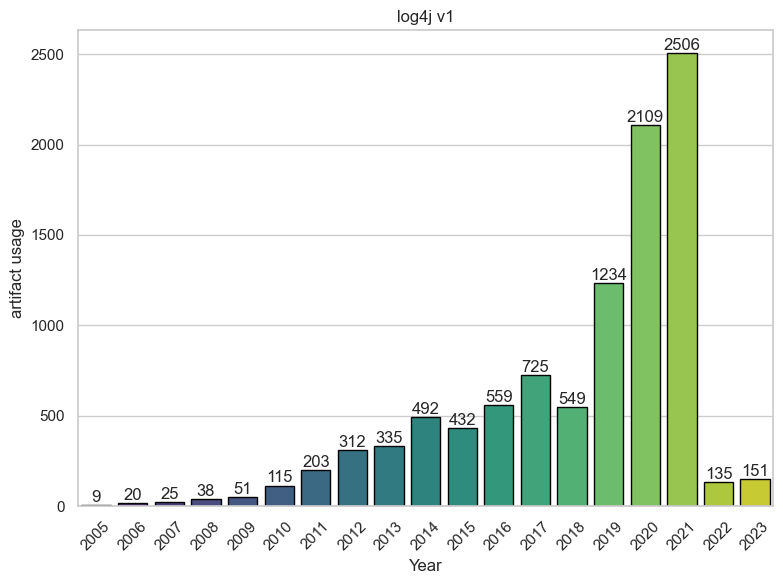

In [103]:
l4j_v1['year'] = l4j_v1['client_time'].dt.year

yearly_counts_v1 = l4j_v1['year'].value_counts().sort_index().reset_index()
yearly_counts_v1.columns = ['Year', 'Count']
plt.figure(figsize=(8, 6))
plot_bargrah(yearly_counts_v1,'log4j v1')

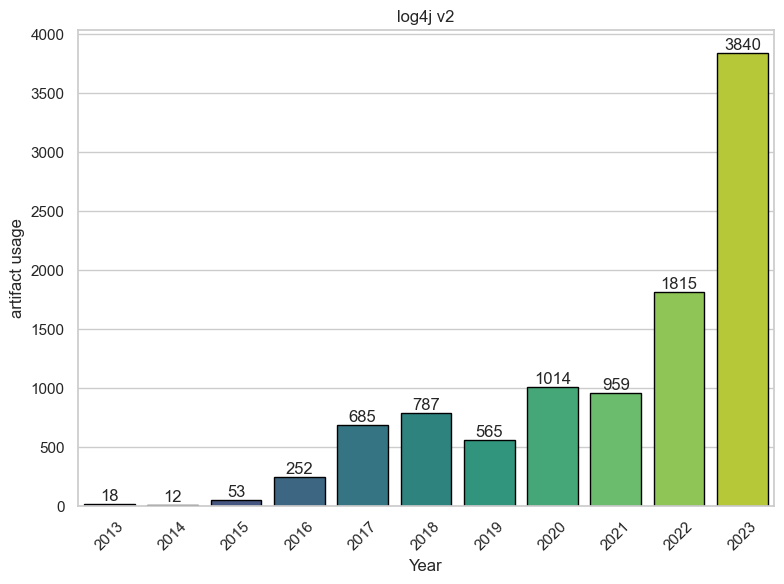

In [104]:
l4j_v2['year'] = l4j_v2['client_time'].dt.year

yearly_counts_v2 = l4j_v2['year'].value_counts().sort_index().reset_index()
yearly_counts_v2.columns = ['Year', 'Count']

plot_bargrah(yearly_counts_v2,'log4j v2')

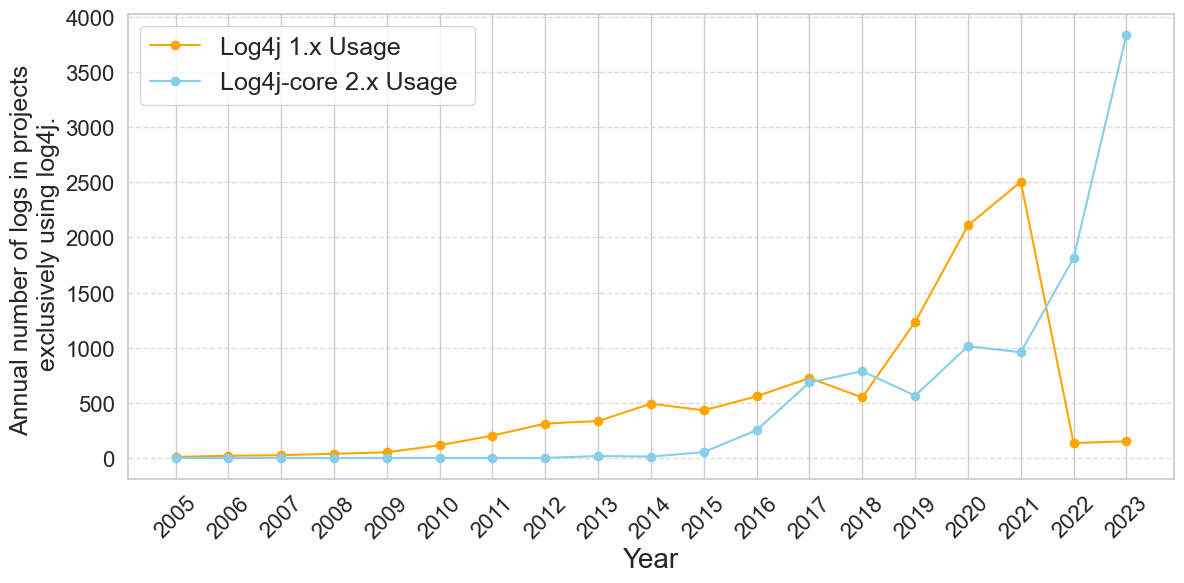

In [105]:
combined_df = pd.merge(yearly_counts_v1, yearly_counts_v2, on="Year", how="outer")
combined_df.fillna(0, inplace=True)
combined_df = combined_df.astype(int)
plot_linegraph(combined_df)

**" Usage trend of Log4j artifacts over the years, filtered to include only released projects. "**



(2717, 7)


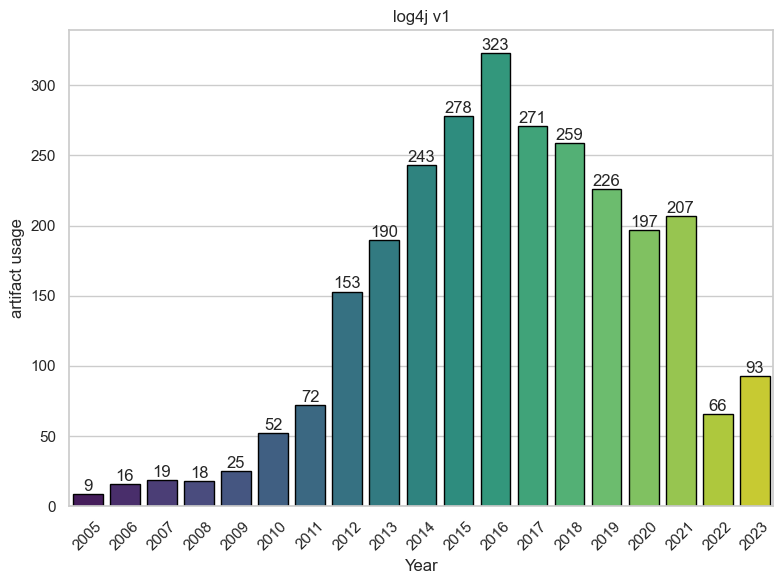

In [106]:
filtered_l4j_v1['year'] = filtered_l4j_v1['client_time'].dt.year
print(filtered_l4j_v1.shape)
yearly_counts_v1 = filtered_l4j_v1['year'].value_counts().sort_index().reset_index()
yearly_counts_v1.columns = ['Year', 'Count']
plot_bargrah(yearly_counts_v1,'log4j v1')

(3680, 7)


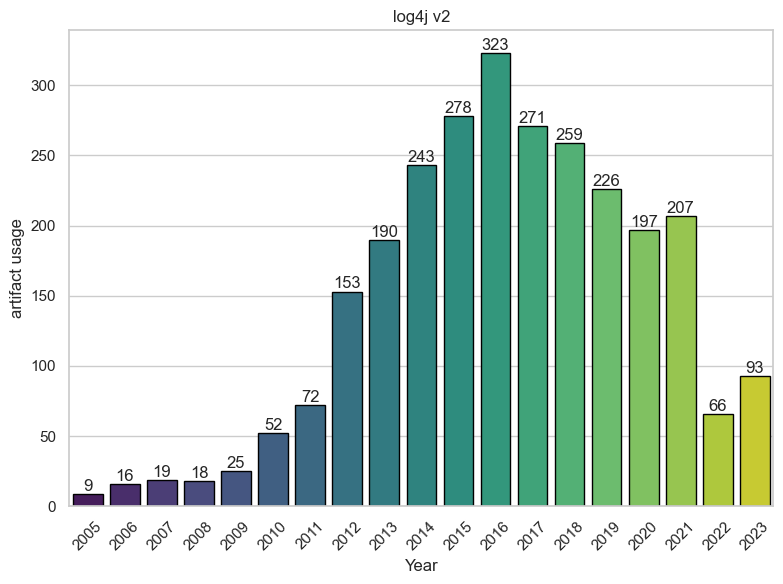

In [107]:
filtered_l4j_v2['year'] = filtered_l4j_v2['client_time'].dt.year
print(filtered_l4j_v2.shape)
yearly_counts_v2 = filtered_l4j_v2['year'].value_counts().sort_index().reset_index()
yearly_counts_v2.columns = ['Year', 'Count']
plot_bargrah(yearly_counts_v1,'log4j v2')

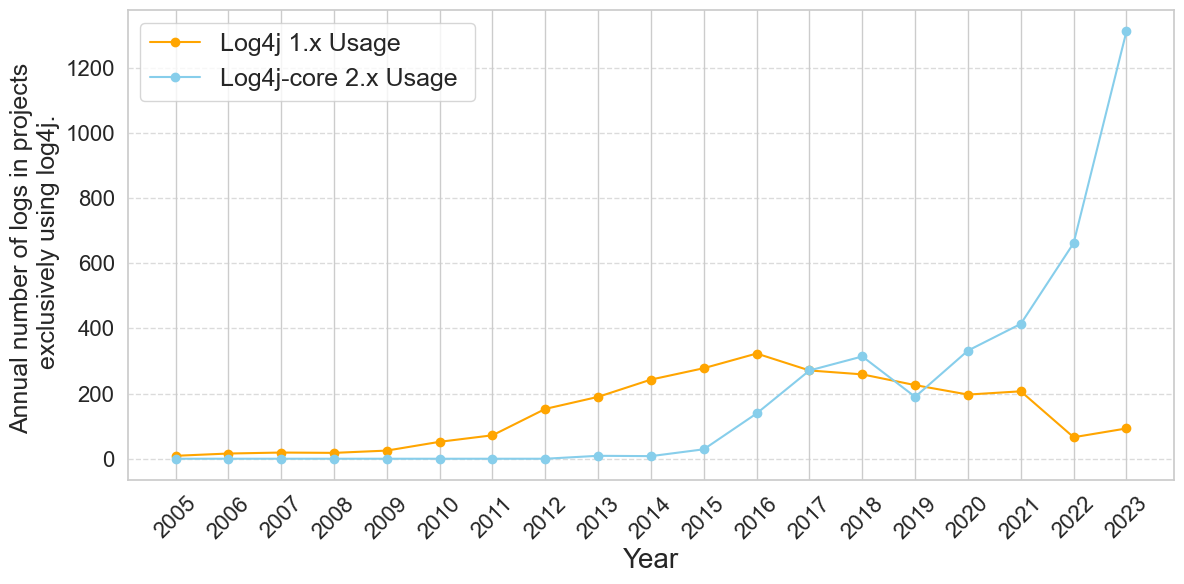

In [108]:
combined_df = pd.merge(yearly_counts_v1, yearly_counts_v2, on="Year", how="outer")
combined_df.fillna(0, inplace=True)
combined_df = combined_df.astype(int)
plot_linegraph(combined_df)

**" According 2 line graph , Deprecated artifacts are still trendy. Our results indicate that although Log4j-Core v2 has been widely adopted, Log4j v1 still remains popular among released artifacts."**


**-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**" Analyse FOR RQ2:  Do newcomer projects tend to adopt the newer version or the deprecated version? "**



In [109]:
def df2arr(df):
    arr = df.to_numpy()
    narr = [x['id'] for x in arr] 
    filter_arr = [x.split(':')[0] +':' + x.split(':')[1]  for x in narr]
    #filter_arr = filter_version_narr1 = [x.split(':')[0] for x in narr]
    return filter_arr
    #return narr

def intersecDF(df1, df2):
    arr1 = df2arr(df1)
    print('artifact_1', len(set(arr1)))
    arr2 = df2arr(df2)
    print('artifact_2', len(set(arr2)))
    intersection = [item for item in arr1 if item in arr2]
    print("Intersection as art:")
    print('Number:', len(set(intersection)))
    #print(intersection)
    return intersection



#252

In [110]:
lst_year = [2005 + i for i in range(19)]
all_artifact_1  = l4j_v1.loc[l4j_v1['year'].isin(lst_year), 'client']
all_artifact_2  = l4j_v2.loc[l4j_v2['year'].isin(lst_year), 'client']
set(intersecDF(all_artifact_1,all_artifact_2))


artifact_1 1292
artifact_2 402
Intersection as art:
Number: 70


{'com.321wing.wingframework:wingframework-logger',
 'com.epam.reportportal:logger-java-log4j',
 'com.hazelcast:hazelcast-build-utils',
 'com.indeed:proctor-maven-plugin',
 'com.qaprosoft:carina-core',
 'com.segmeno:kodo',
 'com.yomahub:tlog-core',
 'de.alpharogroup:wicket-ko-bindings',
 'io.gitlab.anhtd081095:io.gitlab.anhtd081095.util',
 'it.agilelab:wasp-spark-sql-kafka-0-11-old_2.11',
 'org.alluxio:alluxio-tests',
 'org.apache.camel:camel-hdfs2',
 'org.apache.camel:camel-ognl',
 'org.apache.camel:camel-script',
 'org.apache.hbase:hbase-shaded-mapreduce',
 'org.hibernate:hibernate-search-infinispan',
 'org.infinispan.server:infinispan-server-testsuite',
 'org.infinispan:infinispan-cachestore-jdbc',
 'org.infinispan:infinispan-cachestore-remote',
 'org.infinispan:infinispan-cli-client',
 'org.infinispan:infinispan-distribution',
 'org.infinispan:infinispan-extended-statistics',
 'org.infinispan:infinispan-jcache',
 'org.infinispan:infinispan-jcache-parent',
 'org.infinispan:infinispan

In [111]:
lst_year = [2005 + i for i in range(19)]

all_artifact_1  = filtered_l4j_v1.loc[filtered_l4j_v1['year'].isin(lst_year), 'client']
all_artifact_2  = filtered_l4j_v2.loc[filtered_l4j_v2['year'].isin(lst_year), 'client']
set(intersecDF(all_artifact_1,all_artifact_2))

artifact_1 693
artifact_2 401
Intersection as art:
Number: 50


{'com.epam.reportportal:logger-java-log4j',
 'com.indeed:proctor-maven-plugin',
 'com.qaprosoft:carina-core',
 'com.yomahub:tlog-core',
 'de.alpharogroup:wicket-ko-bindings',
 'io.gitlab.anhtd081095:io.gitlab.anhtd081095.util',
 'it.agilelab:wasp-spark-sql-kafka-0-11-old_2.11',
 'org.alluxio:alluxio-tests',
 'org.apache.hbase:hbase-shaded-mapreduce',
 'org.infinispan:infinispan-cachestore-jdbc',
 'org.infinispan:infinispan-cachestore-remote',
 'org.infinispan:infinispan-cli-client',
 'org.infinispan:infinispan-distribution',
 'org.infinispan:infinispan-extended-statistics',
 'org.infinispan:infinispan-jcache',
 'org.infinispan:infinispan-jcache-parent',
 'org.infinispan:infinispan-lucene-demo',
 'org.infinispan:infinispan-lucene-directory',
 'org.infinispan:infinispan-lucene-parent',
 'org.infinispan:infinispan-objectfilter',
 'org.infinispan:infinispan-parent',
 'org.infinispan:infinispan-persistence-cli',
 'org.infinispan:infinispan-persistence-parent',
 'org.infinispan:infinispan-qu

In [112]:
artifact_each_year_1 = {}
for i in lst_year:
    key = str(i)
    artifact_each_year_1[key] = set(df2arr(filtered_l4j_v1.loc[filtered_l4j_v1['year'].isin([i]), 'client']))

artifact_each_year_2 = {}
for i in lst_year:
    key = str(i)
    artifact_each_year_2[key] = set(df2arr(filtered_l4j_v2.loc[filtered_l4j_v2['year'].isin([i]), 'client']))



Filtered set2005: 5
Filtered set2006: 4
Filtered set2007: 7
Filtered set2008: 6
Filtered set2009: 5
Filtered set2010: 15
Filtered set2011: 15
Filtered set2012: 36
Filtered set2013: 56
Filtered set2014: 56
Filtered set2015: 84
Filtered set2016: 74
Filtered set2017: 71
Filtered set2018: 59
Filtered set2019: 34
Filtered set2020: 36
Filtered set2021: 54
Filtered set2022: 36
Filtered set2023: 40
693


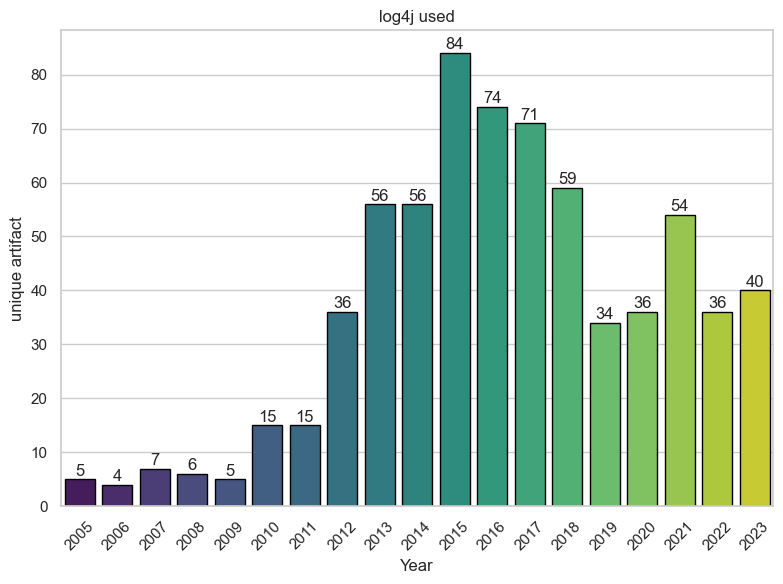

In [113]:

def filter_all_sets_keep_newer(sets):
    element_to_set = {}
    filtered_sets = [set() for _ in sets]  # Initialize empty sets for filtered results

    for i, current_set in enumerate(sets):
        for element in current_set:
            if element in element_to_set:
                old_index = element_to_set[element]
                filtered_sets[old_index].discard(element)
            
            element_to_set[element] = i
            filtered_sets[i].add(element)
    
    return filtered_sets

def filter_all_sets_keep_older(sets):
    seen = set()
    filtered_sets = [set() for _ in sets]  # Initialize empty sets for filtered results

    for i, current_set in enumerate(sets):
        for element in current_set:
            if element not in seen:
                filtered_sets[i].add(element)
                seen.add(element)
    
    return filtered_sets
    
    
all_sets_1 = [artifact_each_year_1[x] for x in artifact_each_year_1.keys()]
all_sets_2 = [artifact_each_year_2[x] for x in artifact_each_year_2.keys()]


filtered_sets_1 = filter_all_sets_keep_newer(all_sets_1)
filtered_sets_2 = filter_all_sets_keep_newer(all_sets_2)


totall = 0
plotYear = []
countYear = []
for i, s in enumerate(filtered_sets_1, 1):
    plotYear.append(lst_year[i-1])
    countYear.append(len(s))
    print(f"Filtered set{lst_year[i-1]}: {len(s)}")
    totall += len(s)

print(totall)

totall = 0


newData = pd.DataFrame()
newData['Year'] = plotYear
newData['Count'] = countYear

plt.figure(figsize=(8, 6))
barplot = sns.barplot(data=newData, x='Year', y='Count', palette= 'viridis', edgecolor='black')
for bar, count in zip(barplot.patches, newData['Count']):
    barplot.text(
        bar.get_x() + bar.get_width() / 2,  
        bar.get_height() + 0.1,             
        str(count),                        
        ha='center',                       
        va='bottom'                         
    )

plt.title('log4j used')
plt.xlabel('Year')
plt.ylabel('unique artifact')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [114]:
def calculate_year_diff(group):
    if len(group) == 1:  # Only one row in the group
        return pd.DataFrame({
            'client': group['client'],
            'year_diff': [0],
            'year_detail': [f"{group.iloc[0]['year']} - {group.iloc[0]['year']}"],
            'newest_year': group.iloc[0]['year']
        })
    year_diff = abs(group.iloc[0]['year'] - group.iloc[1]['year'])
    year_detail = f"{group.iloc[1]['year']} - {group.iloc[0]['year']}"
    newest_year = group.iloc[0]['year'] if year_diff >= 1 else None
    return pd.DataFrame({
        'client': [group.iloc[0]['client']],
        'year_diff': [year_diff],
        'year_detail': [year_detail],
        'newest_year': [newest_year]
    })
# Apply year difference calculation to each group
lst_year = [2005 + i for i in range(19)]

all_artifact_1  = filtered_l4j_v1.loc[filtered_l4j_v1['year'].isin(lst_year), ['client','year']]
all_artifact_2  = filtered_l4j_v2.loc[filtered_l4j_v2['year'].isin(lst_year), ['client','year']]


# Function to normalize the first column
def normalize_value(value):
    parts = value['id'].split(':')
    return f"{parts[0]}:{parts[1]}" if len(parts) > 1 else value

# Apply normalization only to the first column
all_artifact_1['client'] = all_artifact_1['client'].apply(normalize_value)
all_artifact_2['client'] = all_artifact_2['client'].apply(normalize_value)


grouped_artifact_1 = all_artifact_1.groupby(['client', 'year']).size().reset_index(name='count')
grouped_artifact_2 = all_artifact_2.groupby(['client', 'year']).size().reset_index(name='count')



grouped_artifact_1 = grouped_artifact_1.sort_values(by=['client', 'year'], ascending=[True, False])
grouped_artifact_2 = grouped_artifact_2.sort_values(by=['client', 'year'], ascending=[True, False])


filtered_df_art1 = (
    grouped_artifact_1.groupby('client')
    .head(2) 
    .reset_index(drop=True)
)

filtered_df_art2 = (
    grouped_artifact_2.groupby('client')
    .head(2) 
    .reset_index(drop=True)
)

result_1 = filtered_df_art1.groupby('client').apply(calculate_year_diff).reset_index(drop=True)

result_2 = filtered_df_art2.groupby('client').apply(calculate_year_diff).reset_index(drop=True)

In [115]:
latest_year_df = filtered_df_art1.loc[filtered_df_art1.groupby('client')['year'].idxmax()]
latest_year_df_grouped = latest_year_df.groupby('year').size().reset_index(name='count')
print(latest_year_df_grouped)

    year  count
0   2005      5
1   2006      4
2   2007      7
3   2008      6
4   2009      5
5   2010     15
6   2011     15
7   2012     36
8   2013     56
9   2014     56
10  2015     84
11  2016     74
12  2017     71
13  2018     59
14  2019     34
15  2020     36
16  2021     54
17  2022     36
18  2023     40


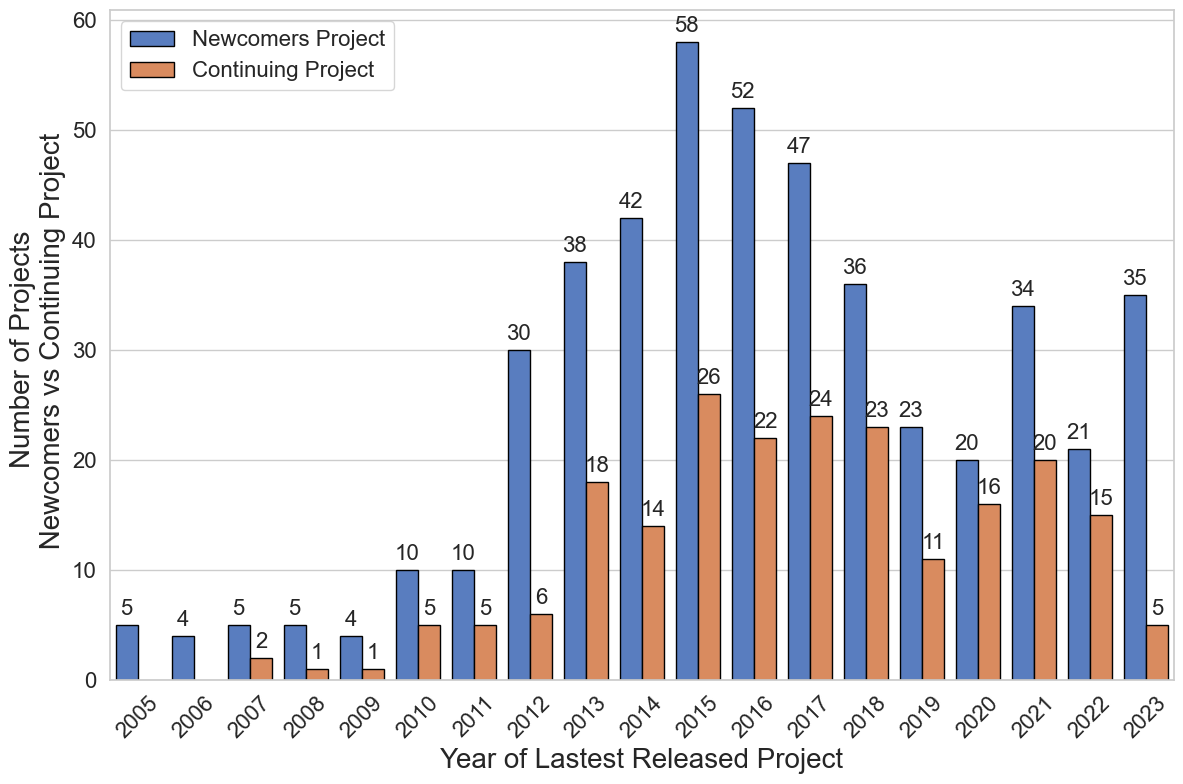

In [116]:

# Filter data and compute counts for Newuser and olduser projects
Newuser_proj = result_1[result_1['year_diff'] == 0]
Newuser_proj = Newuser_proj['newest_year'].value_counts().reset_index()
Newuser_proj.columns = ['year', 'count']
Newuser_proj['status'] = 'Newcomers Project'

olduser_proj = result_1[result_1['year_diff'] >= 1]
olduser_proj = olduser_proj['newest_year'].value_counts().reset_index()
olduser_proj.columns = ['year', 'count']
olduser_proj['status'] = 'Continuing Project'

# Combine olduser and Newuser project data
combined_proj = pd.concat([Newuser_proj, olduser_proj])

# Sort by year for consistent visualization
combined_proj = combined_proj.sort_values(by='year')


plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")  
barplot = sns.barplot(
    data=combined_proj,
    x='year',
    y='count',
    hue='status',  
    palette='muted',  
    edgecolor='black'
)

for bar in barplot.patches:
    x = bar.get_x() + bar.get_width() / 2 
    y = bar.get_height()
    if y > 0:  
        plt.text(x=x, y=y + 0.5, s=int(y), ha='center', va='bottom', fontsize=16
                 )

plt.xlabel('Year of Lastest Released Project', fontsize=20)
plt.ylabel('Number of Projects \n Newcomers vs Continuing Project', fontsize=20)
plt.xticks(rotation=45, fontsize=16)  
plt.yticks(fontsize=16)
plt.legend( fontsize=16, title_fontsize=18,loc='upper left')
plt.tight_layout()  
#plt.savefig('Newcomers_vs_Continuing.pdf', format='pdf')
plt.show()


**From the newcomer vs continuing show that,\
reveals across all 693 projects, an average of (73.31 %) were newcomers adopting Log4j for the first time, while the\remaining (26.69 %) were continuations from prior years. 
Post-2015 data reveals that 404 projects were released after the EOL announcement, of which (66.19 %) were new adopters, while (33.81 %) continued relying on the older Log4j version.\
Interestingly new projects (newcomers) are still adopting the deprecated project, even after the annoucement.**

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**" Analyse FOR RQ3:  Are software projects with more releases more likely to adopt the new version over the deprecated version? "**


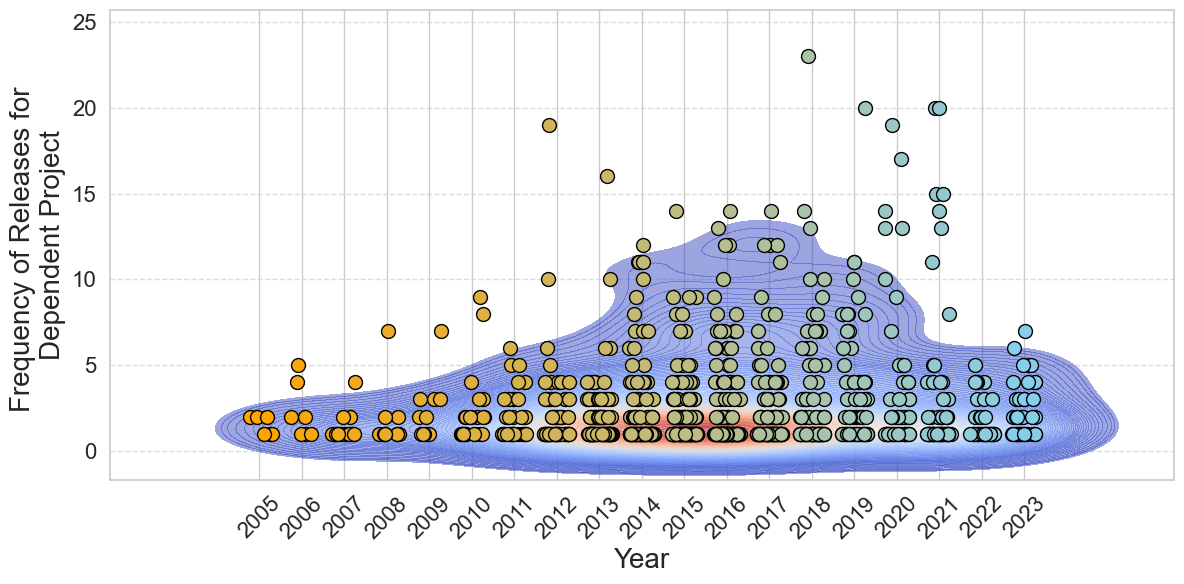

In [119]:
from matplotlib.colors import LinearSegmentedColormap

cmap = LinearSegmentedColormap.from_list("OrangeSkyBlue", ["#FFA500", "#87CEEB"])
unique_years = sorted(grouped_artifact_1["year"].unique())  # Sort years for consistent color mapping
colors = cmap(np.linspace(0, 1, len(unique_years)))  # Generate gradient colors
year_to_color = dict(zip(unique_years, colors))  # Map each year to a gradient color

# Add jitter to the data for better visibility
jitter = 0.3  
years_with_jitter = grouped_artifact_1["year"] + np.random.uniform(-jitter, jitter, size=len(grouped_artifact_1))

plt.figure(figsize=(12, 6))  
sns.kdeplot(
    x=grouped_artifact_1["year"],
    y=grouped_artifact_1["count"],
    cmap="coolwarm",
    fill=True,
    alpha=0.5,
    levels=100,
    thresh=0.05
)

for year, color in year_to_color.items():
    plt.scatter(
        years_with_jitter[grouped_artifact_1["year"] == year],
        grouped_artifact_1["count"][grouped_artifact_1["year"] == year],
        color=color,
        edgecolor="black",
        s=100,
        label=str(year)  
    )
plt.xlabel("Year", fontsize=20)
plt.ylabel("Frequency of Releases for \nDependent Project", fontsize=20)

all_years = range(int(grouped_artifact_1["year"].min()), int(grouped_artifact_1["year"].max()) + 1)
plt.xticks(all_years, rotation=45, fontsize=16)
plt.yticks(fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
#plt.savefig('Released_Project_activites.pdf', format='pdf')
plt.show()


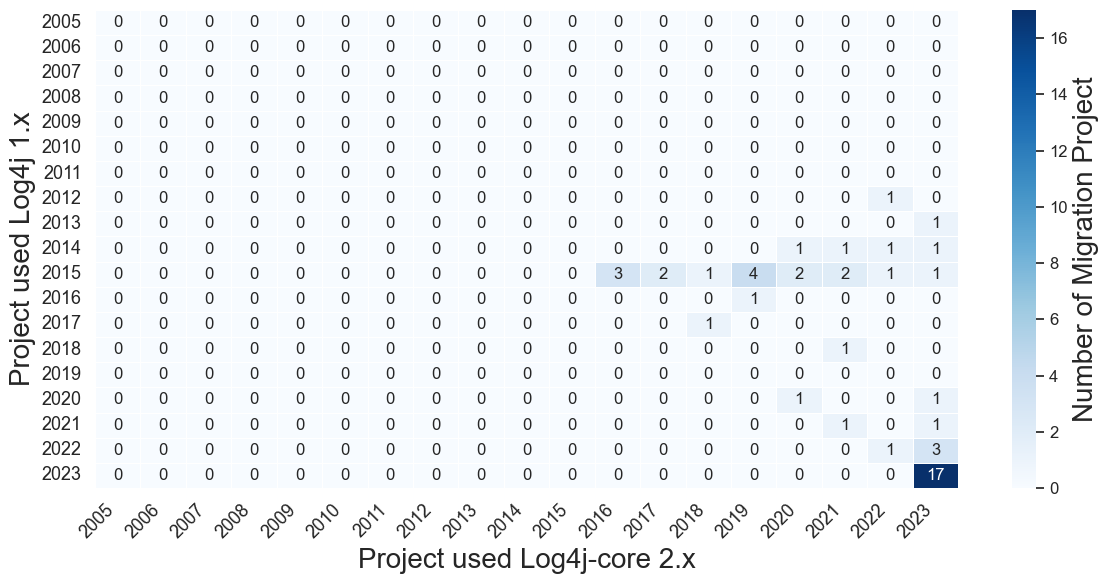

In [118]:


group1 = {f'{lst_year[i]}': filtered_sets_1[i] for i in range(19)}  
group2 = {f'{lst_year[i]}': filtered_sets_2[i] for i in range(19)} 

overlap_data = []
group1_names = list(group1.keys())
group2_names = list(group2.keys())
check32 = []
for g1_name, g1_values in group1.items():
    row = []
    for g2_name, g2_values in group2.items():
        overlap_count = len(g1_values & g2_values)  
        row.append(overlap_count)
        if (g1_name in ['log4j_v1_2021','log4j_v1_2022','log4j_v1_2023'] and g2_name in ['log4j_v2_2021','log4j_v2_2022','log4j_v2_2023']):
            check32.append(g1_values & g2_values)
    overlap_data.append(row)

overlap_df = pd.DataFrame(overlap_data, index=group1_names, columns=group2_names)

plt.figure(figsize=(12, 6))
sns.heatmap(
    overlap_df,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar_kws={'label': 'Number of Migration Project'},
    linewidths=0.5,
    annot_kws={"size": 12}
)
cbar = plt.gca().collections[0].colorbar 
cbar.ax.tick_params(labelsize=12)  
cbar.set_label("Number of Migration Project", size=20)  
#plt.title("Migrate Between (log4j_v1 vs log4j_v2)", fontsize=16)
plt.ylabel("Project used Log4j 1.x",fontsize=20)
plt.xlabel("Project used Log4j-core 2.x",fontsize=20)
plt.xticks(rotation=45, ha='right',fontsize=13)
plt.yticks(rotation=0,fontsize=13)
plt.tight_layout()
#plt.savefig('Migration_number.pdf', format='pdf')
plt.show()


**From our 2 graph show that Despite the end-of-life (EOL) announcement for Log4j 1.x in 2015, 33.81 % of projects continued using the outdated version post-EOL, while only (10.89 %) migrated to Log4j-core 2.x.**